In [ ]:
# clustring

# Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

-- K-Means and Hierarchical Clustering are both popular clustering algorithms used in unsupervised machine learning, but they differ in their approach to grouping data points.
K-Means is a partitioning method that divides the data into K clusters by minimizing the within-cluster variance. It requires the number of clusters (K) to be specified beforehand and iteratively assigns data points to the nearest cluster center until convergence. A use case for K-Means is customer segmentation in marketing, where businesses can group customers based on purchasing behavior to tailor marketing strategies.
Hierarchical Clustering, on the other hand, builds a hierarchy of clusters either by agglomerative (bottom-up) or divisive (top-down) methods. It does not require the number of clusters to be specified in advance and can produce a dendrogram to visualize the cluster relationships. A use case for Hierarchical Clustering is gene expression analysis in bioinformatics, where researchers can identify groups of genes with similar expression patterns across different conditions or time points.


# Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
-- The Silhouette Score is a metric used to evaluate the quality of clustering algorithms. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters, while a score close to -1 indicates that the object may have been assigned to the wrong cluster. A score around 0 suggests that the object is on or very close to the decision boundary between two neighboring clusters. The Silhouette Score helps in determining the optimal number of clusters and assessing the overall performance of the clustering algorithm.

#  Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

-- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that identifies clusters based on the density of data points. The core parameters of DBSCAN are:
1. Epsilon (eps): This parameter defines the maximum distance between two points for them to be considered as part of the same cluster. A smaller eps value will result in more clusters with fewer points, while a larger eps value may lead to fewer clusters with more points.
2. Minimum Samples (min_samples): This parameter specifies the minimum number of points required to form a dense region (cluster). A higher min_samples value will require more points to form a cluster, which can lead to fewer clusters and more noise points, while a lower min_samples value may result in more clusters and fewer noise points.
These parameters influence the clustering process by determining how clusters are formed and how noise is handled. Proper   tuning of these parameters is crucial for achieving meaningful clustering results with DBSCAN.

# Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
-- Feature scaling is important when applying clustering algorithms like K-Means and DBSCAN because these algorithms rely on distance calculations to group data points. If the features have different scales, the algorithm may give more weight to features with larger ranges, leading to biased clustering results. For example, if one feature has values in the range of 0 to 1000 and another feature has values in the range of 0 to 1, the algorithm may primarily cluster based on the first feature, overshadowing the influence of the second feature. By applying feature scaling techniques such as normalization or standardization, we can ensure that all features contribute equally to the distance calculations, resulting in more accurate and meaningful clusters.

# Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
-- The Elbow Method is a technique used in K-Means clustering to determine the optimal number of clusters (K). It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for an "elbow" point where the rate of decrease in WCSS slows down significantly. The WCSS measures the total variance within each cluster, and as K increases, WCSS typically decreases. However, after a certain point, adding more clusters does not significantly reduce WCSS, indicating that the optimal number of clusters has been reached. The Elbow Method helps to identify this point visually, allowing practitioners to choose a K value that balances cluster compactness and simplicity.

# Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
-- To generate synthetic data using `make_blobs`, apply KMeans clustering, and visualize the results with cluster centers, you can use the following code:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=
42)
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('KMeans Clustering of Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


# Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
-- To load the Wine dataset, apply StandardScaler, and train a DBSCAN model, you can use the following code:

```python
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
# Load the Wine dataset
wine = load_wine()
X = wine.data
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
# Get the labels and count the number of clusters (excluding noise)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters found (excluding noise): {n_clusters}')




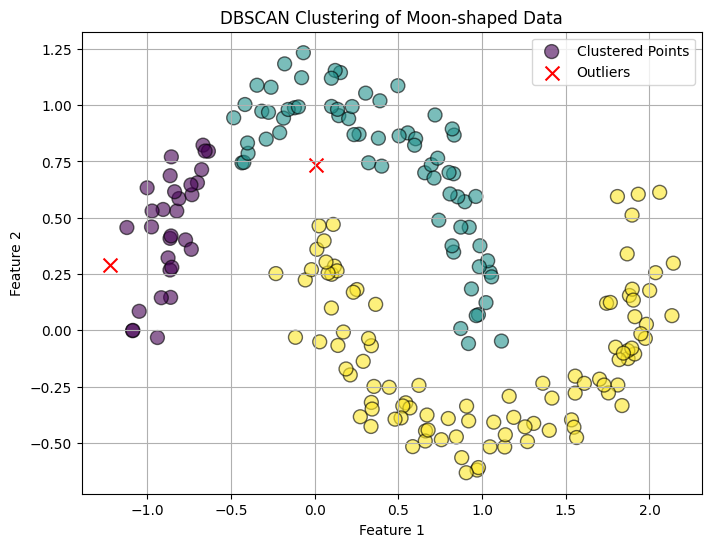

In [2]:
#Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
# Identify outliers (noise points)
outliers = labels == -1
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.6, label='Clustered Points')
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', marker='x', s=100, label='Outliers')
plt.title('DBSCAN Clustering of Moon-shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
-- To load the Wine dataset, reduce it to 2D using PCA, apply Agglomerative Clustering, and visualize the result in 2D with a scatter plot, you can use the following code:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
# Load the Wine dataset
wine = load_wine()
X = wine.data
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)

labels = agglo.fit_predict(X_pca)
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.6)
plt.title('Agglomerative Clustering of Wine Dataset (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()




In [ ]:
# Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

-- To segment customers based on their purchasing behavior, I would follow a structured data science workflow using clustering techniques:
1. Data Preprocessing:
- Handle Missing Values: I would first analyze the dataset for any missing values. Depending on the extent and nature of the missing data, I would either impute missing values using techniques like mean/median imputation or remove records with excessive missing data.
- Scaling: Since clustering algorithms are sensitive to the scale of the data, I would apply feature scaling using StandardScaler or MinMaxScaler to ensure that all features contribute equally to the distance calculations.
2. Clustering Algorithm Selection:
- I would consider using K-Means clustering for its efficiency and simplicity, especially if the dataset is large. K-Means works well when clusters are spherical and of similar sizes. However, if the data has irregular shapes or varying densities, I would opt for DBSCAN, which can identify clusters of arbitrary shapes and handle noise effectively.
3. Determining the Number of Clusters:
- For K-Means, I would use the Elbow Method and Silhouette Score to determine the optimal number of clusters. The Elbow Method helps visualize the point where adding more clusters does not significantly reduce the within-cluster variance, while the Silhouette Score provides insight into how well-separated the clusters are.
- For DBSCAN, I would tune the eps and min_samples parameters based on the data distribution and use domain knowledge to guide the selection.
4. Clustering Analysis and Benefits:
- Once the clustering is complete, I would analyze the characteristics of each cluster, identifying key demographics and purchasing behaviors that define each segment.
- The marketing team would benefit from this clustering analysis by gaining insights into distinct customer segments, allowing them to design targeted promotions and personalized marketing strategies. This could lead to increased customer engagement, higher conversion rates, and improved customer retention by addressing the specific needs and preferences of each segment. Additionally, understanding customer behavior patterns can help in inventory management and product recommendations, ultimately driving sales growth for the e-commerce company.
